In [44]:
import random
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from configobj import ConfigObj
config = ConfigObj('config')

ml_home = config.get(
    'ml_home', '/')
sys.path.append('../util')
sys.path.append(ml_home)
sys.path.append(ml_home+ '/features')

sys.path.append(ml_home+ '/eda')
import plot_helper
import myutil
import ml_util  
import features

In [15]:
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
%matplotlib inline

In [16]:
def read_data(datafname):
    df = pd.read_csv(datafname)
    df.columns = [myutil.camel_to_snake(c) for c in df.columns]
    print df.columns
    df.rename(columns={'unnamed: 0':'id'}, inplace=True)
    df.columns = [u'id', u'dlqin2yrs', u'revolv_util_unsec_lines', u'age', u'n_30-59d_late', \
                  u'debt_income_ratio', u'monthly_income', u'n_openloans_creditlines', \
                  u'n_90d_late', u'n_realestate_loans', u'n_60-89d_late', u'n_dependents']
    cols_reordered = [u'id', u'dlqin2yrs', u'age', u'revolv_util_unsec_lines',  u'debt_income_ratio'\
                      , u'monthly_income', u'n_openloans_creditlines', u'n_realestate_loans',  u'n_dependents',\
                      u'n_30-59d_late',u'n_60-89d_late', u'n_90d_late']
    df = df[cols_reordered]
    yname = df.columns[1]
    xnames = df.columns[2:]
    return df, xnames, yname

In [17]:
df, xnames, yname = read_data('data/credit-training.csv')

Index([u'unnamed: 0', u'serious_dlqin2yrs', u'revolving_utilization_of_unsecured_lines', u'age', u'number_of_time30-59_days_past_due_not_worse', u'debt_ratio', u'monthly_income', u'number_of_open_credit_lines_and_loans', u'number_of_times90_days_late', u'number_real_estate_loans_or_lines', u'number_of_time60-89_days_past_due_not_worse', u'number_of_dependents'], dtype='object')


In [18]:
print "shape: ", df.shape

shape:  (150000, 12)


In [19]:
df.head().T

,0,1,2,3,4
id,1.000000,2.000000,3.000000,4.00000,5.000000
dlqin2yrs,1.000000,0.000000,0.000000,0.00000,0.000000
age,45.000000,40.000000,38.000000,30.00000,49.000000
revolv_util_unsec_lines,0.766127,0.957151,0.658180,0.23381,0.907239
debt_income_ratio,0.802982,0.121876,0.085113,0.03605,0.024926
monthly_income,9120.000000,2600.000000,3042.000000,3300.00000,63588.000000
n_openloans_creditlines,13.000000,4.000000,2.000000,5.00000,7.000000
n_realestate_loans,6.000000,0.000000,0.000000,0.00000,1.000000
n_dependents,2.000000,1.000000,0.000000,0.00000,0.000000
n_30-59d_late,2.000000,0.000000,1.000000,0.00000,1.000000


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,150000,75000.500000,43301.414527,1,37500.750000,75000.500000,112500.250000,150000
dlqin2yrs,150000,0.066840,0.249746,0,0.000000,0.000000,0.000000,1
age,150000,52.295207,14.771866,0,41.000000,52.000000,63.000000,109
revolv_util_unsec_lines,150000,6.048438,249.755371,0,0.029867,0.154181,0.559046,50708
debt_income_ratio,150000,353.005076,2037.818523,0,0.175074,0.366508,0.868254,329664
monthly_income,120269,6670.221237,14384.674215,0,3400.000000,5400.000000,8249.000000,3008750
n_openloans_creditlines,150000,8.452760,5.145951,0,5.000000,8.000000,11.000000,58
n_realestate_loans,150000,1.018240,1.129771,0,0.000000,1.000000,2.000000,54
n_dependents,146076,0.757222,1.115086,0,0.000000,0.000000,1.000000,20
n_30-59d_late,150000,0.421033,4.192781,0,0.000000,0.000000,0.000000,98


In [21]:
print ml_util.count_null(df)

                         not_null   null  pct_null
variable                                          
age                        150000      0         0
debt_income_ratio          150000      0         0
dlqin2yrs                  150000      0         0
id                         150000      0         0
monthly_income             120269  29731        19
n_30-59d_late              150000      0         0
n_60-89d_late              150000      0         0
n_90d_late                 150000      0         0
n_dependents               146076   3924         2
n_openloans_creditlines    150000      0         0
n_realestate_loans         150000      0         0
revolv_util_unsec_lines    150000      0         0


In [60]:
#df.apply(pd.Series.value_counts, axis=1).fillna(0)
print df.dlqin2yrs.value_counts()
#print df.nunique()
print df.mode()
print df.count()
print df.nuni

0    139974
1     10026
dtype: int64
   id  dlqin2yrs  age  revolv_util_unsec_lines  debt_income_ratio  \
0 NaN          0   49                        0                  0   

   monthly_income  n_openloans_creditlines  n_realestate_loans  n_dependents  \
0            5000                        6                   0             0   

   n_30-59d_late  n_60-89d_late  n_90d_late  
0              0              0           0  
id                         150000
dlqin2yrs                  150000
age                        150000
revolv_util_unsec_lines    150000
debt_income_ratio          150000
monthly_income             120269
n_openloans_creditlines    150000
n_realestate_loans         150000
n_dependents               146076
n_30-59d_late              150000
n_60-89d_late              150000
n_90d_late                 150000
dtype: int64


## summary stats y

In [22]:
icol_y = 1
print '%i total samples, %i positives %.2f%%' % \
(df.shape[0], df.iloc[:,icol_y].sum(),100.0* df.iloc[:,icol_y].sum()/df.shape[0])
unique, counts = np.unique(df.iloc[:,icol_y], return_counts=True)
print 'counts by y'
print np.asarray((unique, counts)).T

150000 total samples, 10026 positives 6.68%
counts by y
[[     0 139974]
 [     1  10026]]


- im-balanced class, 6.7% positive. need adjust models accordinly.

## summary stats X - Univariate

In [90]:
ml_util.describe_df(df).T

,count,unique_counts,min,max,mean,50%,std,25%,75%
id,150000,150000,1,150000,75000.500000,75000.500000,43301.414527,37500.750000,112500.250000
dlqin2yrs,150000,2,0,1,0.066840,0.000000,0.249746,0.000000,0.000000
age,150000,86,0,109,52.295207,52.000000,14.771866,41.000000,63.000000
revolv_util_unsec_lines,150000,125728,0,50708,6.048438,0.154181,249.755371,0.029867,0.559046
debt_income_ratio,150000,114194,0,329664,353.005076,0.366508,2037.818523,0.175074,0.868254
monthly_income,120269,13594,0,3008750,6670.221237,5400.000000,14384.674215,3400.000000,8249.000000
n_openloans_creditlines,150000,58,0,58,8.452760,8.000000,5.145951,5.000000,11.000000
n_realestate_loans,150000,28,0,54,1.018240,1.000000,1.129771,0.000000,2.000000
n_dependents,146076,13,0,20,0.757222,0.000000,1.115086,0.000000,1.000000
n_30-59d_late,150000,16,0,98,0.421033,0.000000,4.192781,0.000000,0.000000


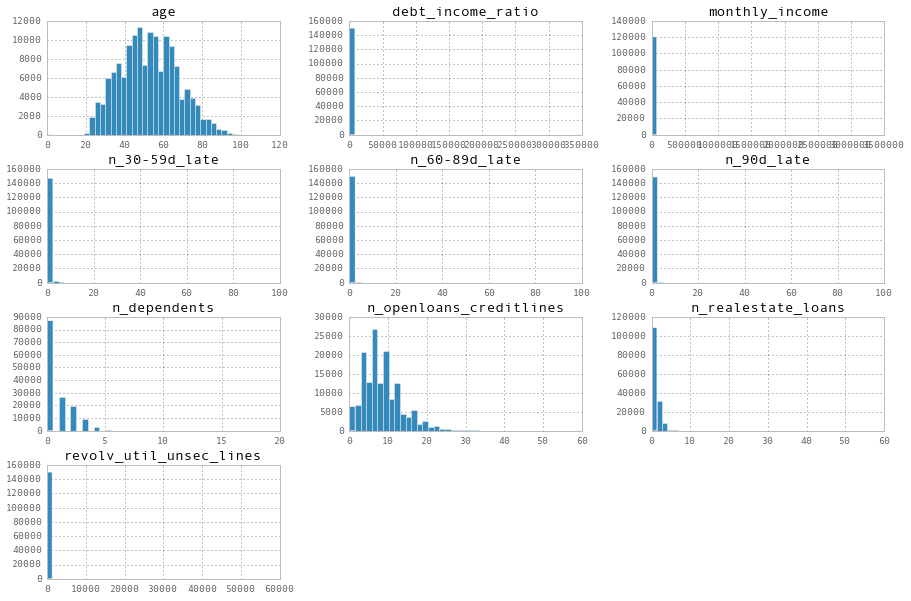

In [23]:
colname_id = 'id'
colname_y = 'dlqin2yrs'
colnames_X = df.columns - [colname_id, colname_y]
df[colnames_X].hist( bins= 40, figsize=(15, 10))
plt.show()

### explor missing values, outliers, data codings 

In [233]:
feature_name = 'age'
df2[feature_name].value_counts()

49     3837
48     3806
50     3753
63     3719
47     3719
46     3714
53     3648
51     3627
52     3609
56     3589
62     3568
54     3561
61     3522
45     3502
58     3443
55     3416
57     3375
44     3294
59     3280
60     3258
43     3208
41     3122
40     3093
42     3082
64     3058
39     2987
38     2631
65     2594
37     2521
67     2503
       ... 
24      816
81      774
82      647
23      641
83      512
85      483
84      480
22      434
86      407
87      357
88      313
89      276
90      198
21      183
91      154
92       93
93       87
94       47
95       45
96       18
97       17
99        9
98        6
103       3
102       3
101       3
109       2
107       1
105       1
0         1
dtype: int64

In [ ]:
def func_binning(x):
    if x == 0:
        return 0
    if x > 90:
        return x
    else:
        return 1
s = df[feature_name].apply(func_binning)
s.name = 'bin'
df_tmp = pd.concat([df[yname],s], axis=1)
gb = df_tmp.groupby(sname)
df_stats = gb[yname].agg(['count', np.sum])
df_stats['pct_deliq'] = df_stats['sum']/df_stats['count']
print df_stats

In [227]:
def func_n_days_late_binning(x):
    if x == 0:
        return 0
    if x > 90:
        return -1
    else:
        return x

colsnames = ['n_90d_late','n_30-59d_late','n_60-89d_late']
cols_mod_names = [x + '_mod' for x in colsnames]
for col in colsnames:
    col_mod = col + '_mod'
    col_missing = col + '_missing'
    df2[col_mod] = df[col].apply(func_n_90d_late_binning) # missing coded as -1
    df2[col_missing] = df[col].apply(lambda x: 1 if x > 90 else 0)
df2['total_late_days'] = df2[cols_mod_names].apply(lambda x: np.sum(x), axis = 1)
#df2['total_late_days'] = df2['total_late_days'].apply(lambda x: -1 if x < 0 else x)
print df2.head(5)

   id  dlqin2yrs  age  revolv_util_unsec_lines  debt_income_ratio  \
0   1          1   45                 0.766127           0.802982   
1   2          0   40                 0.957151           0.121876   
2   3          0   38                 0.658180           0.085113   
3   4          0   30                 0.233810           0.036050   
4   5          0   49                 0.907239           0.024926   

   monthly_income  n_openloans_creditlines  n_realestate_loans  n_dependents  \
0            9120                       13                   6             2   
1            2600                        4                   0             1   
2            3042                        2                   0             0   
3            3300                        5                   0             0   
4           63588                        7                   1             0   

   n_30-59d_late       ...         n_dependents_capped  \
0              2       ...                    

In [49]:
cond = df['monthly_income'].isnull()
cond_debt_income_ratio = df['debt_income_ratio'] > 50
print df[cond].shape
print df[~cond & cond_debt_income_ratio ].shape
print df[~cond & cond_debt_income_ratio ].n_90d_late.sum()
df[~cond & cond_debt_income_ratio ].head(20)

(29731, 12)
(1796, 12)
116


,id,dlqin2yrs,age,revolv_util_unsec_lines,debt_income_ratio,monthly_income,n_openloans_creditlines,n_realestate_loans,n_dependents,n_30-59d_late,n_60-89d_late,n_90d_late
14,15,0,76,0.019657,477.0,0,6,1,0,0,0,0
44,45,0,68,0.368876,1687.5,1,31,1,0,0,0,0
50,51,0,73,0.818978,3095.0,0,9,1,0,0,1,0
73,74,0,31,0.059669,3162.0,0,11,2,1,0,0,0
90,91,0,51,0.039388,15466.0,0,7,0,0,0,0,0
167,168,0,29,0.020966,639.5,1,3,1,2,0,0,0
195,196,1,38,0.025892,74.5,1,13,0,2,0,0,0
217,218,0,42,0.222696,800.0,1,3,1,2,0,0,0
298,299,0,25,0.085152,1005.0,0,5,0,0,0,0,0
326,327,0,43,0.013115,4211.0,0,21,2,2,0,0,0


In [27]:
print df[cond]['debt_income_ratio'].describe()
print df[~cond]['debt_income_ratio'].describe()

count     29731.000000
mean       1673.396556
std        4248.372895
min           0.000000
25%         123.000000
50%        1159.000000
75%        2382.000000
max      329664.000000
Name: debt_income_ratio, dtype: float64
count    120269.000000
mean         26.598777
std         424.446457
min           0.000000
25%           0.143388
50%           0.296023
75%           0.482559
max       61106.500000
Name: debt_income_ratio, dtype: float64


In [24]:
#df.monthly_income.quantile(99.9/100)

df[colnames_X].quantile(99.9/100)

age                           94.000
debt_income_ratio          10613.074
monthly_income             78395.748
n_30-59d_late                 98.000
n_60-89d_late                 98.000
n_90d_late                    98.000
n_dependents                   6.000
n_openloans_creditlines       34.000
n_realestate_loans             9.000
revolv_util_unsec_lines     1571.006
dtype: float64

In [48]:
cond_revolv_uti = df.revolv_util_unsec_lines > 2
print df[cond_revolv_uti].shape
print 1.0* df[cond_revolv_uti].dlqin2yrs.sum()/df[cond_revolv_uti].dlqin2yrs.count()
print df[cond_revolv_uti].dlqin2yrs.sum(), df[cond_revolv_uti].dlqin2yrs.count()
df[cond_revolv_uti].head(20)

(371, 12)
0.145552560647
54 371


,id,dlqin2yrs,age,revolv_util_unsec_lines,debt_income_ratio,monthly_income,n_openloans_creditlines,n_realestate_loans,n_dependents,n_30-59d_late,n_60-89d_late,n_90d_late
293,294,0,45,2340.000000,0.339333,8333,7,2,2,0,0,0
697,698,1,58,2066.000000,0.271121,6000,8,1,1,0,0,1
900,901,0,33,2.258964,0.032484,2000,1,0,2,2,0,1
1991,1992,1,44,1143.000000,0.547762,6500,13,4,2,2,0,0
2331,2332,0,59,6324.000000,0.136673,11318,4,1,1,0,0,0
2428,2429,0,64,2.837807,0.411417,11000,8,2,2,2,0,0
2573,2574,1,65,2.760956,0.470273,1681,3,0,0,0,0,4
4278,4279,0,33,1982.000000,0.144982,8000,4,0,0,0,0,0
4793,4794,0,52,3746.000000,0.481353,2600,5,1,3,2,0,0
5956,5957,0,60,2.237856,2597.000000,1,16,2,4,6,1,1


In [28]:
threashhold = 400
f = lambda x: x <= threashhold
operator = '=='
col_name = 'monthly_income'
cond = df[col_name].apply(f)
cnt = df[cond][col_name].count()
pct = 100.0 * cnt / df.shape[0]
print '%s %s %.2f cnt: %i  pct: %.2f' % (col_name, operator, threashhold, cnt, pct)

monthly_income == 400.00 cnt: 2610  pct: 1.74


In [29]:
df_x_capped = features.cap_df(df,colnames_X, pct = 0.99)
print "\n", "historgram after capping"
#hists(df_x_capped, df_x_capped.columns)


historgram after capping


In [122]:
print df.columns
df2 = pd.concat([df, df_x_capped], axis = 1)

Index([u'id', u'dlqin2yrs', u'age', u'revolv_util_unsec_lines', u'debt_income_ratio', u'monthly_income', u'n_openloans_creditlines', u'n_realestate_loans', u'n_dependents', u'n_30-59d_late', u'n_60-89d_late', u'n_90d_late', u'n_90d_late_mod'], dtype='object')


In [31]:
df2['n_creditline'] = df.n_openloans_creditlines-df.n_realestate_loans
df2.n_creditline.describe()

count    150000.000000
mean          7.434520
std           4.765642
min           0.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          57.000000
Name: n_creditline, dtype: float64

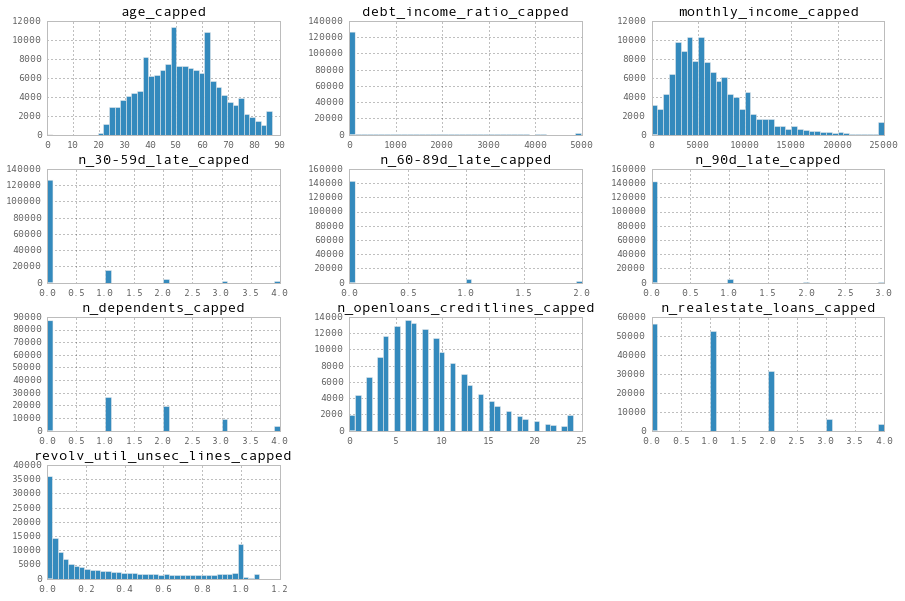

In [32]:
df_x_capped.hist( bins= 40, figsize=(15, 10))
plt.show()

## Bivariate


### continous features

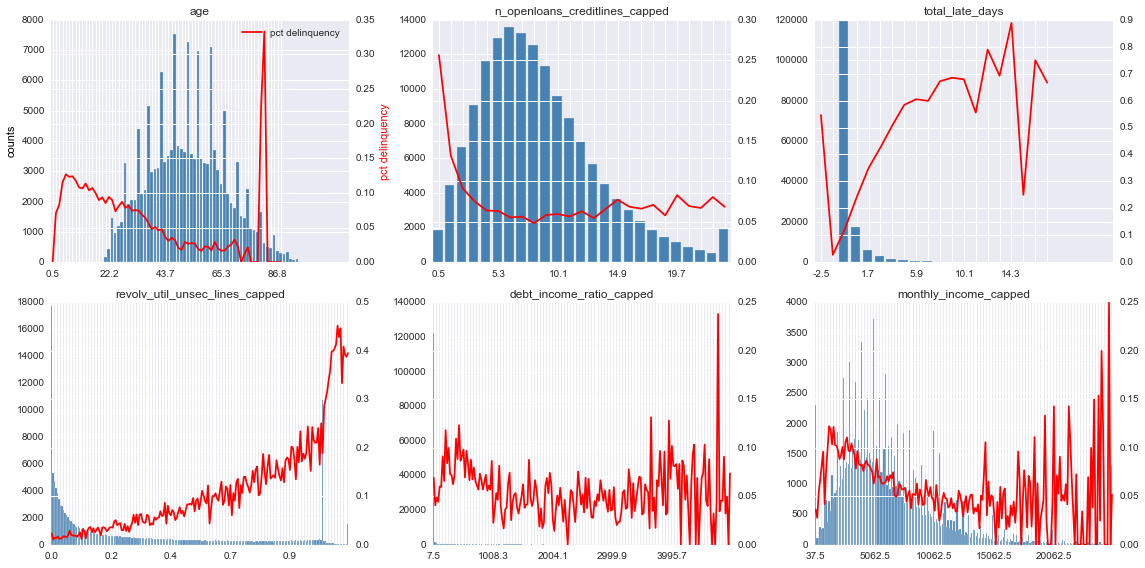

In [232]:
conti_col_names = [ u'age',  u'n_openloans_creditlines_capped', 'total_late_days'
                   ,'revolv_util_unsec_lines_capped', u'debt_income_ratio_capped'\
    , u'monthly_income_capped']
nbins = 200
#conti_col_names = ['age']
fig = plot_helper.plot_ybinary_xnumerical(df2[conti_col_names], df2[yname], n_per_row=3, nbins = nbins, figsize=(16,8))
fig.show()

### log transformation

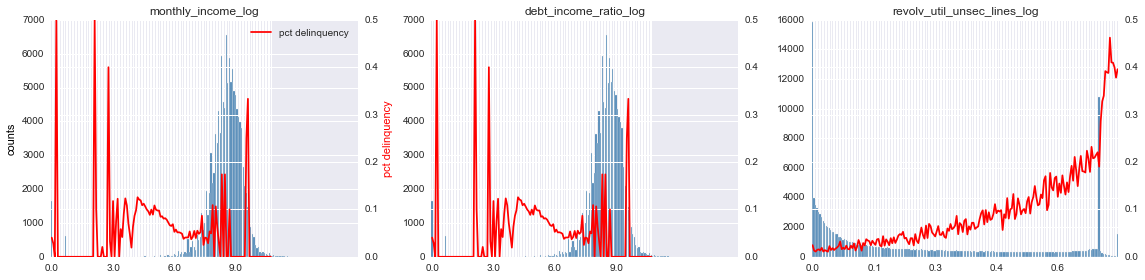

In [230]:
import math
df2['monthly_income_log'] = df2['monthly_income'].apply(lambda x: np.log(x+1))
df2['debt_income_ratio_log'] = df2['monthly_income'].apply(lambda x: np.log(x+1))
df2['revolv_util_unsec_lines_log'] = df2['revolv_util_unsec_lines_capped'].apply(lambda x: np.log(x+1))
conti_col_names = ['monthly_income_log','debt_income_ratio_log','revolv_util_unsec_lines_log' ]
fig = plot_helper.plot_ybinary_xnumerical(df2[conti_col_names], df2[yname], n_per_row=3, nbins = 200, figsize=(16,4))
fig.show()

### categorical features

In [135]:
cat_col_names = [
    u'n_realestate_loans', \
   'n_dependents', u'n_30-59d_late', u'n_30-59d_late_mod', \
    u'n_60-89d_late', u'n_60-89d_late_mod', u'n_90d_late', 'n_90d_late_mod']

cat_col_names =  [
   # u'n_realestate_loans',
    'n_90d_late_mod']

In [171]:
def plot_cat_var(df, catx_names, y_name, figsize=(16,4), n_per_row=3, title = ''):
    x_shift = 0
    nplots = len(catx_names)
    nrows_plot = nplots // n_per_row
    if nplots % n_per_row > 0:
        nrows_plot = nrows_plot + 1
    fig, axs = plt.subplots(nrows_plot, n_per_row, figsize=figsize)
    axs_flat = axs.flatten()
    for i, cat in enumerate(catx_names):
        ax = axs_flat[i]
        ax2 = ax.twinx()
        avg_pos = df.groupby(cat)[y_name].mean()
        avg_pos.plot(kind='bar', ax=ax2, color='r', alpha = 0.5, position = 0)
        
        #avg_pos.plot(kind='line', color='r', ax=ax2, alpha = 0.5) # this does not align well
        #plt.plot(avg_pos.index.values+x_shift, avg_pos.values, color='r')
        cnt = df.groupby(cat)[y_name].sum()

        cnt.plot(kind='bar', color= 'steelblue', ax = ax)#, position = 1) #darkgray
        ax.set_title(cat)
        width = 0.4
        #print avg_pos.index.values+x_shift, avg_pos.values
        #print cnt

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
 

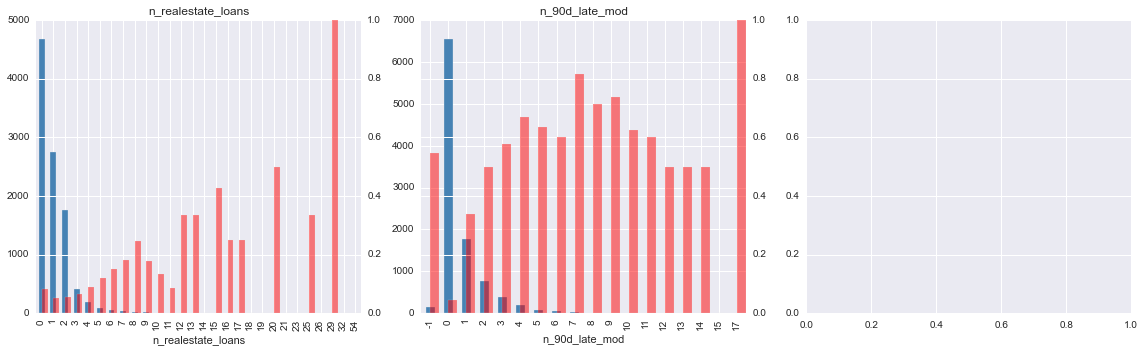

In [172]:
plot_cat_var(df2,cat_col_names,yname, figsize=(16,5))

## Interaction between continous variables

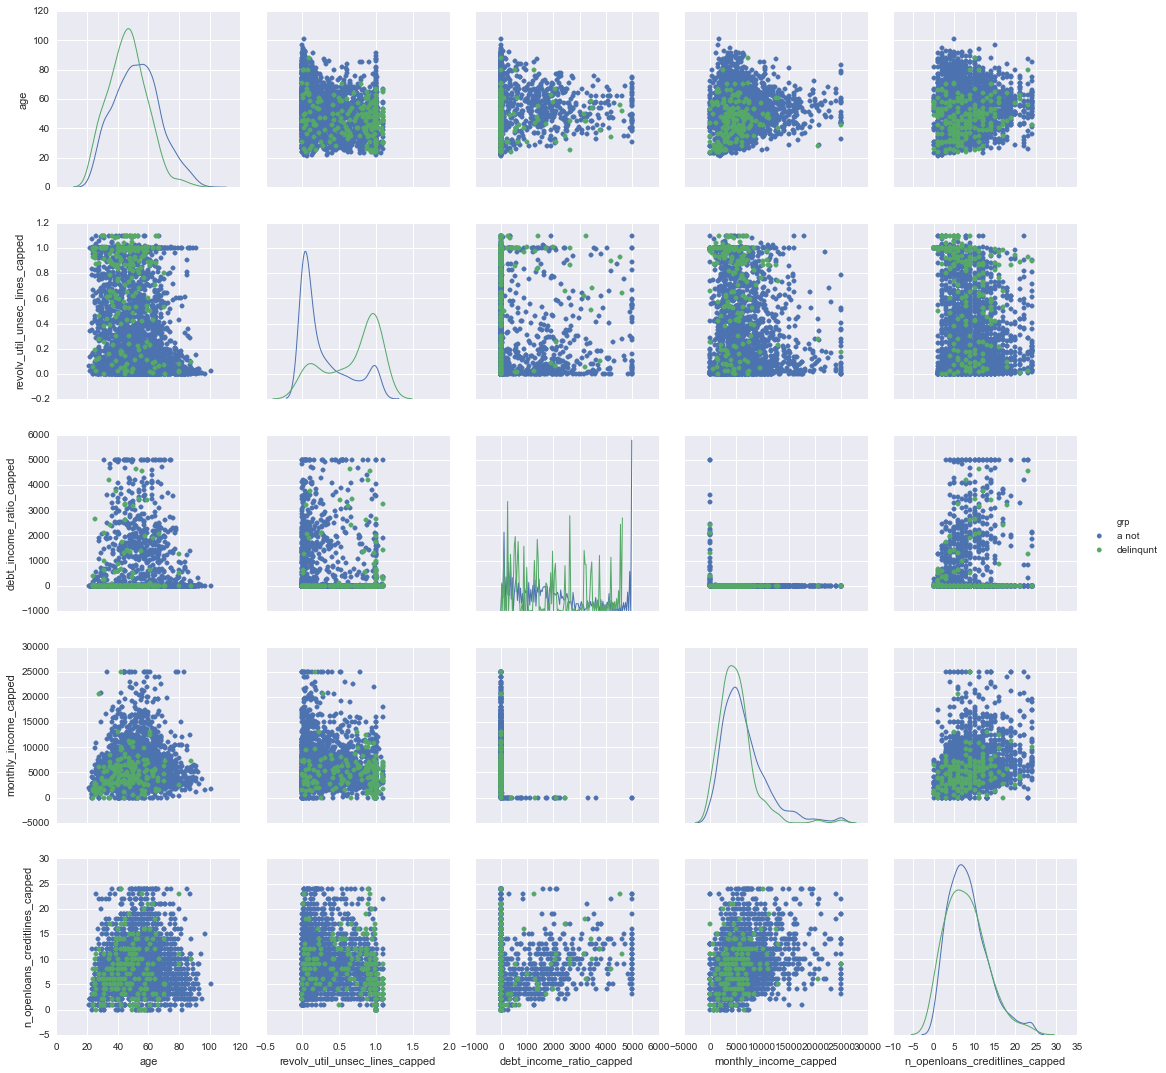

In [38]:
import seaborn as sns

sns.set()
n_samples = 3000
#colnames = [yname] + [t + '_capped'for t in conti_col_names]
# [ u'age', u'revolv_util_unsec_lines_capped', u'debt_income_ratio_capped'\
#    , u'monthly_income_capped', u'n_openloans_creditlines_capped']
df2['grp'] = df2[yname].apply(lambda x: 'delinqunt' if x == 1 else 'a not' )
#xnames_tmp = ['revolv_util_unsec_lines_capped', 'monthly_income_capped', 'grp']  
xnames_tmp = [ u'age', u'revolv_util_unsec_lines_capped', u'debt_income_ratio_capped'\
    , u'monthly_income_capped', u'n_openloans_creditlines_capped', 'grp']
colnames= [yname] + xnames_tmp
rows_sampled = random.sample(df.index, n_samples)
df_sample5k = df2.ix[rows_sampled, colnames]
sns.set()
g = sns.PairGrid(df_sample5k[xnames_tmp], diag_sharey=False, hue='grp')
#g = sns.PairGrid(df_sample5k[xnames_tmp], diag_sharey=False, hue=df_sample5k[yname])
g.map_diag(sns.kdeplot, lw=1)
g.map_lower(plt.scatter)
g.map_upper(plt.scatter)
g.add_legend()

In [39]:
print df_x_capped.columns

Index([u'age_capped', u'debt_income_ratio_capped', u'monthly_income_capped', u'n_30-59d_late_capped', u'n_60-89d_late_capped', u'n_90d_late_capped', u'n_dependents_capped', u'n_openloans_creditlines_capped', u'n_realestate_loans_capped', u'revolv_util_unsec_lines_capped'], dtype='object')


In [40]:
np.sum(df[yname])

10026

In [182]:
t = pd.cut(np.array([.2, 1.4, 2.5, 6.2, 9.7, 2.1]), 3)
print type(t)

<class 'pandas.core.categorical.Categorical'>


In [183]:
t, bins =   pd.cut(np.array([.2, 1.4, 2.5, 6.2, 9.7, 2.1]), 3, retbins=True)
print t
print bins

[(0.191, 3.367], (0.191, 3.367], (0.191, 3.367], (3.367, 6.533], (6.533, 9.7], (0.191, 3.367]]
Categories (3, object): [(0.191, 3.367] < (3.367, 6.533] < (6.533, 9.7]]
[ 0.1905      3.36666667  6.53333333  9.7       ]
